In [60]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [62]:
# Load the dataset
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/dataset/online_shoppers_intention.csv"))
data


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [63]:
# checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [64]:
# checking for duplicates
duplicates_count = data.duplicated().sum()
print({duplicates_count})

{125}


In [65]:
data.drop_duplicates(inplace=True)

duplicates_count = data.duplicated().sum()
print({duplicates_count})

{0}


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [67]:
# statistics of dataset after cleaning

print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.00000

In [68]:
# Assuming numerical features are all columns except 'Revenue' and categorical features
numerical_features = data.drop('Revenue', axis=1).select_dtypes(include=np.number).columns.tolist()

# Normalize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

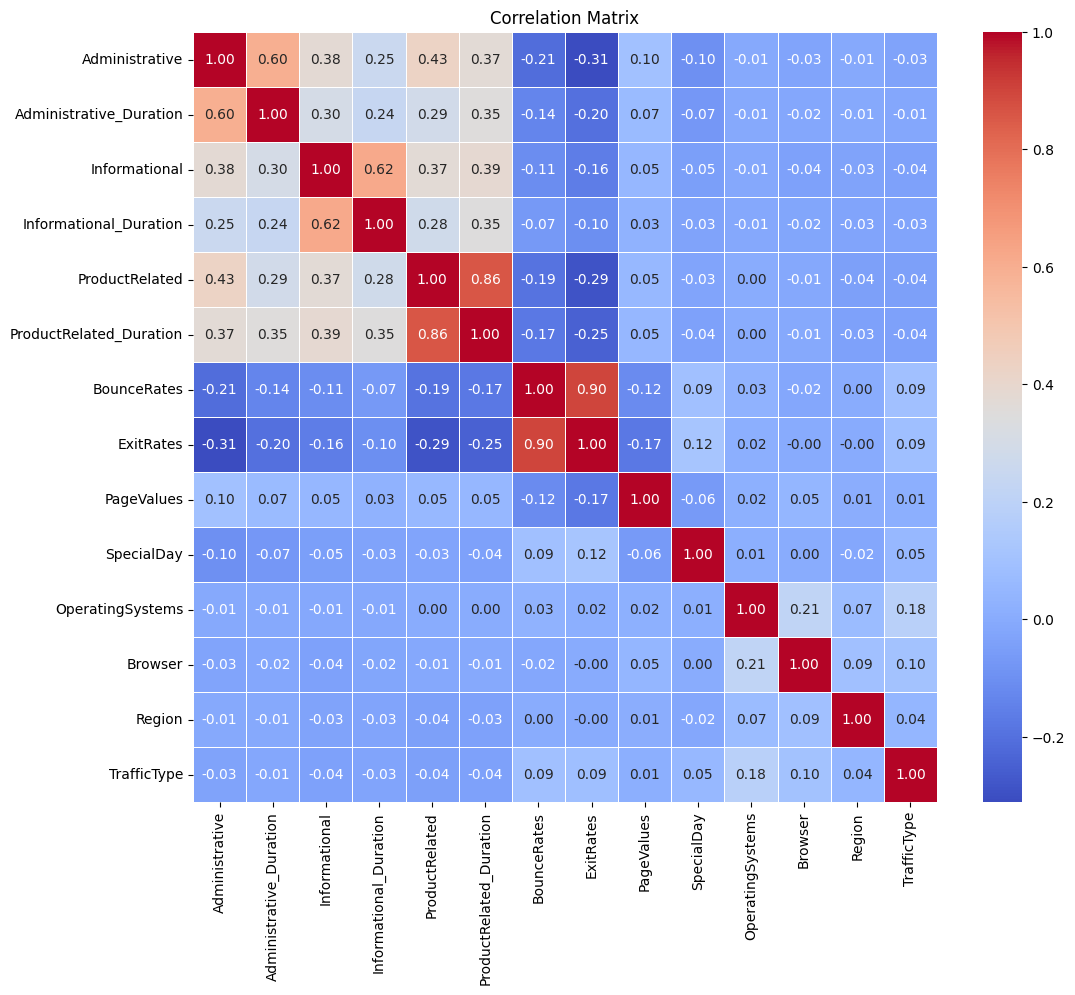

In [73]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [70]:
# splitting dataset
X = data.drop('Revenue', axis=1)
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# One-hot encode categorical variables
X_train = pd.get_dummies(X_train)

# Fit RFE on the transformed data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'ExitRates', 'PageValues'],
      dtype='object')


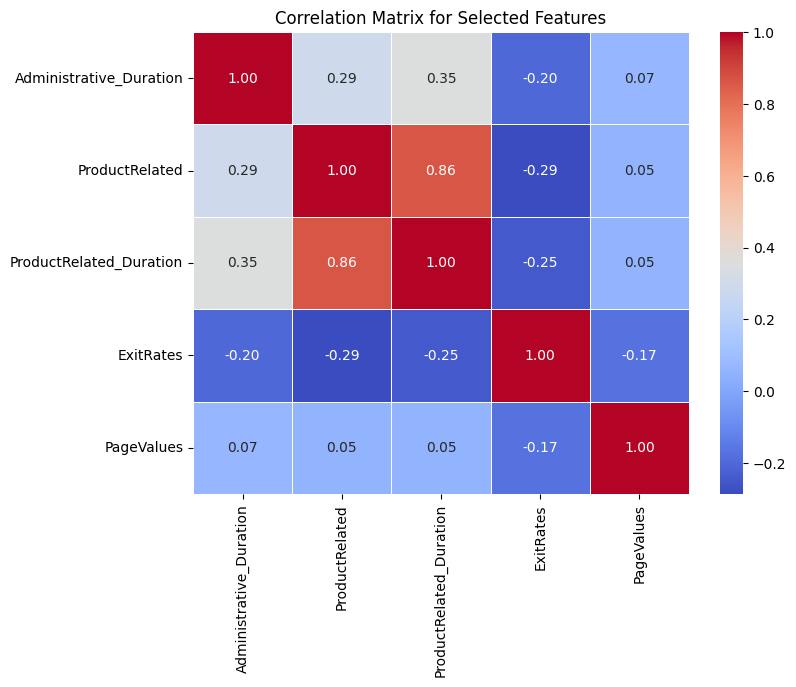

In [53]:
selected_features_data = data[selected_features]
selected_features_correlation = selected_features_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(selected_features_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Selected Features")
plt.show()

In [57]:
# Initialize models
logistic_regression = LogisticRegression(random_state=random_seed)
decision_tree = DecisionTreeClassifier(random_state=random_seed)
random_forest = RandomForestClassifier(random_state=random_seed)
svm = SVC(random_state=random_seed)

In [58]:
# Define a list of models
models = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Support Vector Machine', svm)
]

In [59]:
# Evaluate models using cross-validation
results = {}
for name, model in models:
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

# Find the best performing model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print("Results:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

print(f"\nBest Performing Model: {best_model} (Accuracy: {best_accuracy:.4f})")

Results:
Logistic Regression: 0.8820
Decision Tree: 0.8551
Random Forest: 0.8892
Support Vector Machine: 0.8917

Best Performing Model: Support Vector Machine (Accuracy: 0.8917)
